# Location Viz Sample Notebook - Python

In this notebook we will work with data from our Weighted Position model for Presence Insights to visualize location data before and after we apply our smoothing algorithm. 

### Load the data

First, we will need to upload our location data file to the object store.
- Create an object store in your Spark service instance
- On the palette to the right, navigate to the Data Sources tab
- Download [sample data](https://raw.githubusercontent.com/reinaldo422/bluemix-spark-viz/master/smoothed_data.json) (right-click and Save As...) and add as a source


In [1]:
# Import SQLContext and data types
from pyspark.sql import SQLContext
from pyspark.sql.types import *
 
# Spark Notebook has existing SparkContext (sc)
sqlContext = SQLContext(sc)

# Read sample Presence Insights position data
json = sqlContext.read.json("swift://notebooks.spark/smoothed_data.json")

### Separate each individual event

In [2]:
from pyspark.sql.functions import explode

# Use explode to create rows for each individual device event
df = json.select("sites", explode("data").alias("data"))

devicesDF = df.select(
            df.data.original.device_descriptor.alias("device"),
            df.sites.floors.properties.z.getItem(0).alias("z"),
            "data.original.x",
            "data.original.y",
            "data.smooth_x",
            "data.smooth_y")

devicesDF.registerTempTable("devices")

In [3]:
devicesDF.show()

+--------+---+------------------+------------------+------------------+------------------+
|  device|  z|                 x|                 y|          smooth_x|          smooth_y|
+--------+---+------------------+------------------+------------------+------------------+
|device24|  1| 72.73045591866911| 8.319840421742114| 72.73045591866911| 8.319840421742114|
| device3|  1|  90.5465310009641|36.703487552984704|  90.5465310009641|36.703487552984704|
|device10|  1| 41.25040011924511| 6.408479153740125| 41.25040011924511| 6.408479153740125|
|device14|  1| 23.90948333701854| 35.87029559275763| 23.90948333701854| 35.87029559275763|
|device36|  1|111.62702944750662|29.922133782003073|111.62702944750662|29.922133782003073|
| device0|  1|19.393095282881173|  8.46391803339744|19.393095282881173|  8.46391803339744|
|device33|  1| 74.54123897274856|15.496943428451699| 74.54123897274856|15.496943428451699|
|device27|  1| 52.31651450464346| 39.98552293379546| 52.31651450464346| 39.98552293379546|

### Select device and floor

In [4]:
plot_data = sqlContext.sql("SELECT * FROM devices WHERE device='device1' AND z=0").collect()

## Plotting with matplotlib
### Gather the data

In [5]:
x = []
y = []
smooth_x = []
smooth_y = []

for data in plot_data:
    x.append(data.x)
    y.append(data.y)
    smooth_x.append(data.smooth_x)
    smooth_y.append(data.smooth_y)

### Raw data

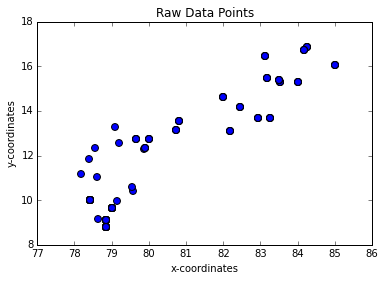

In [6]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


area = np.pi * 15
plt.scatter(x, y, s=area, c="blue")
plt.title('Raw Data Points')
plt.xlabel('x-coordinates')
plt.ylabel('y-coordinates')
plt.show()

### Smooth data

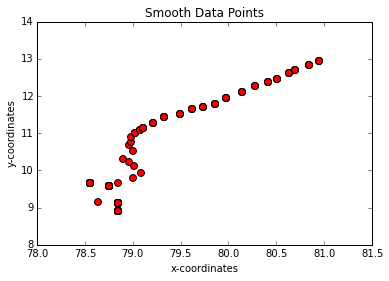

In [7]:
plt.scatter(smooth_x, smooth_y, s=area, c="red")
plt.title('Smooth Data Points')
plt.xlabel('x-coordinates')
plt.ylabel('y-coordinates')
plt.show()